**Your challenge can be found toward the end of this notebook. The code below will be needed in order to begin the challenge. Read through and execute all necessary portions of this code to complete the tasks for this challenge.**

In [1]:
##### Import the necessary packages
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
##### Cleaning the Dataset
df_orig = pd.read_excel('C:/Pranjali/Technocolabs/Datasets p2/default_of_credit_card_clients.xls')

In [3]:
df_orig.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df_zero_mask = df_orig == 0

In [5]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [6]:
sum(feature_zero_mask)

315

**Remove all the rows with all zero features and response, confirm this that gets rid of the duplicate IDs.**

In [7]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
df_clean.shape

(29685, 25)

In [8]:
df_clean['ID'].nunique()

29685

**Clean up the `EDUCATION` and `MARRIAGE` features as in Chapter 1**

In [9]:
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

In [10]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [12]:
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

In [13]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

**Now instead of removing rows with `PAY_1` = 'Not available', as done in Chapter 1, here select these out for addition to training and testing splits.**

In [14]:
df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [15]:
#Create a Boolean mask to identify the rows with this value:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'

In [16]:
sum(missing_pay_1_mask)

3021

In [17]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()

In [18]:
df_missing_pay_1.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17,f0ba5e02-0c0f,320000,1,1,1,49,Not available,0,0,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
28,aecb449b-a999,50000,2,3,1,47,Not available,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
29,57ea9a1f-cdd5,50000,1,1,2,26,Not available,0,0,0,...,17907,18375,11400,1500,1500,1000,1000,1600,0,0


In [19]:
df_missing_pay_1.shape

(3021, 25)

In [20]:
df_missing_pay_1['PAY_1'].value_counts()

Not available    3021
Name: PAY_1, dtype: int64

In [21]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**"Load cleaned data"**

In [22]:
df = pd.read_csv('cleaned_data.csv')

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [24]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

**Mode and Random Imputation of `PAY_1`**

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [28]:
features_response[4]

'PAY_1'

In [29]:
df_missing_pay_1.shape

(3021, 25)

In [30]:
np.median(X_train[:,4])

0.0

In [31]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [32]:
fill_strategy = ['mode', 'random']

In [33]:
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

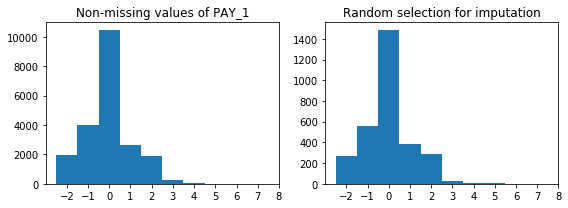

In [34]:
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

**To do cross-validation on the training set, now we need to shuffle since all the samples with missing `PAY_1` were concatenated on to the end.**

In [35]:
from sklearn.model_selection import KFold

In [36]:
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

**Don't need to do a grid search, so we can use `cross_validate`**

In [37]:
from sklearn.model_selection import cross_validate

**For the estimator, set the optimal hyperparameters determined in previous chapter.**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(
    n_estimators=200, criterion='gini', max_depth=9,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=1, warm_start=False, class_weight=None)

In [40]:
for counter in range(len(fill_values)):
       #Copy the data frame with missing PAY_1 and assign imputed values
        df_fill_pay_1_filled = df_missing_pay_1.copy()
        df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
        
        #Split imputed data in to training and testing, using the same
        #80/20 split we have used for the data with non-missing PAY_1
        X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
        train_test_split(
            df_fill_pay_1_filled[features_response[:-1]].values,
            df_fill_pay_1_filled['default payment next month'].values,
        test_size=0.2, random_state=24)
        

In [41]:
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

In [42]:
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
        cv=k_folds, n_jobs=-1, verbose=1,
        return_train_score=True, return_estimator=True,
        error_score='raise-deprecating')
 
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   17.7s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   17.8s finished


**A Predictive Model for `PAY_1`**

In [43]:
pay_1_df = df.copy()

In [44]:
features_for_imputation = pay_1_df.columns.tolist()

In [45]:
items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [46]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]

**Building a Multiclass Classification Model for Imputation**

In [47]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

In [48]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

**Need to use accuracy here as ROC AUC is not supported for multiclass. Need to use multiclass and not regression because need to limit to integer values of `PAY_1`.**

In [49]:
from sklearn.model_selection import GridSearchCV
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy', n_jobs=-1, iid=False, refit=True,
cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [50]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=1, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],

In [51]:
cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [52]:
cv_rf_impute.best_score_

0.7337676389523727

In [53]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [54]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [55]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [56]:
from sklearn import metrics
metrics.accuracy_score(y_impute_test, y_impute_predict)

0.7387961747609225

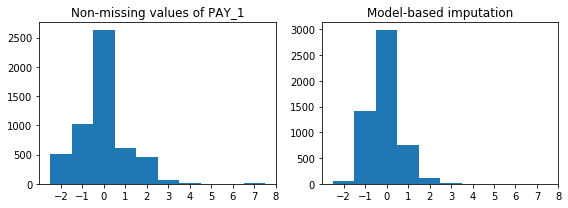

In [57]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [58]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

In [59]:
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)

In [60]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Using the Imputation Model and Comparing it to Other Methods**

In [61]:
df_fill_pay_1_model = df_missing_pay_1.copy()

In [62]:
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [63]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [64]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [65]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [66]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
    test_size=0.2, random_state=24)

In [67]:
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

(2416, 17)
(605, 17)
(2416,)
(605,)


In [68]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

In [69]:
print(X_train_all.shape)
print(y_train_all.shape)

(23747, 17)
(23747,)


In [70]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [71]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   13.9s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.0s finished


In [72]:
imputation_compare_cv['test_score']

array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

In [73]:
np.mean(imputation_compare_cv['test_score'])

0.7726757126815554

In [74]:
np.std(imputation_compare_cv['test_score'])

0.002931480680760725

**Reassign values using mode imputation**

In [75]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

In [76]:
df_fill_pay_1_model['PAY_1'].unique()

array([0], dtype=int64)

In [77]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [78]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [79]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [80]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   14.0s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.1s finished


In [81]:
np.mean(imputation_compare_cv['test_score'])

0.772866246168149

**Confirming Model Performance on the Unseen Test Set**

In [82]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   10.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [83]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.7696243835824927

**Characterizing Costs and Savings**

In [85]:
thresholds = np.linspace(0, 1, 101)

**Use mean bill amount to estimate savings per prevented default**

In [86]:
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [87]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default

51601.7433479286

In [88]:
cost_per_counseling = 7500

In [89]:
effectiveness = 0.70

In [90]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)
savings_based_on_balances = np.empty_like(thresholds)

In [91]:
    counter = 0
    for threshold in thresholds:
        pos_pred = y_test_all_predict_proba[:,1]>threshold
        n_pos_pred[counter] = sum(pos_pred)
        cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
        true_pos = pos_pred & y_test_all.astype(bool)
        n_true_pos[counter] = sum(true_pos)
        savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
        
        counter += 1

In [92]:
net_savings = savings_of_all_counselings - cost_of_all_counselings

In [93]:
print(net_savings.shape)


(101,)


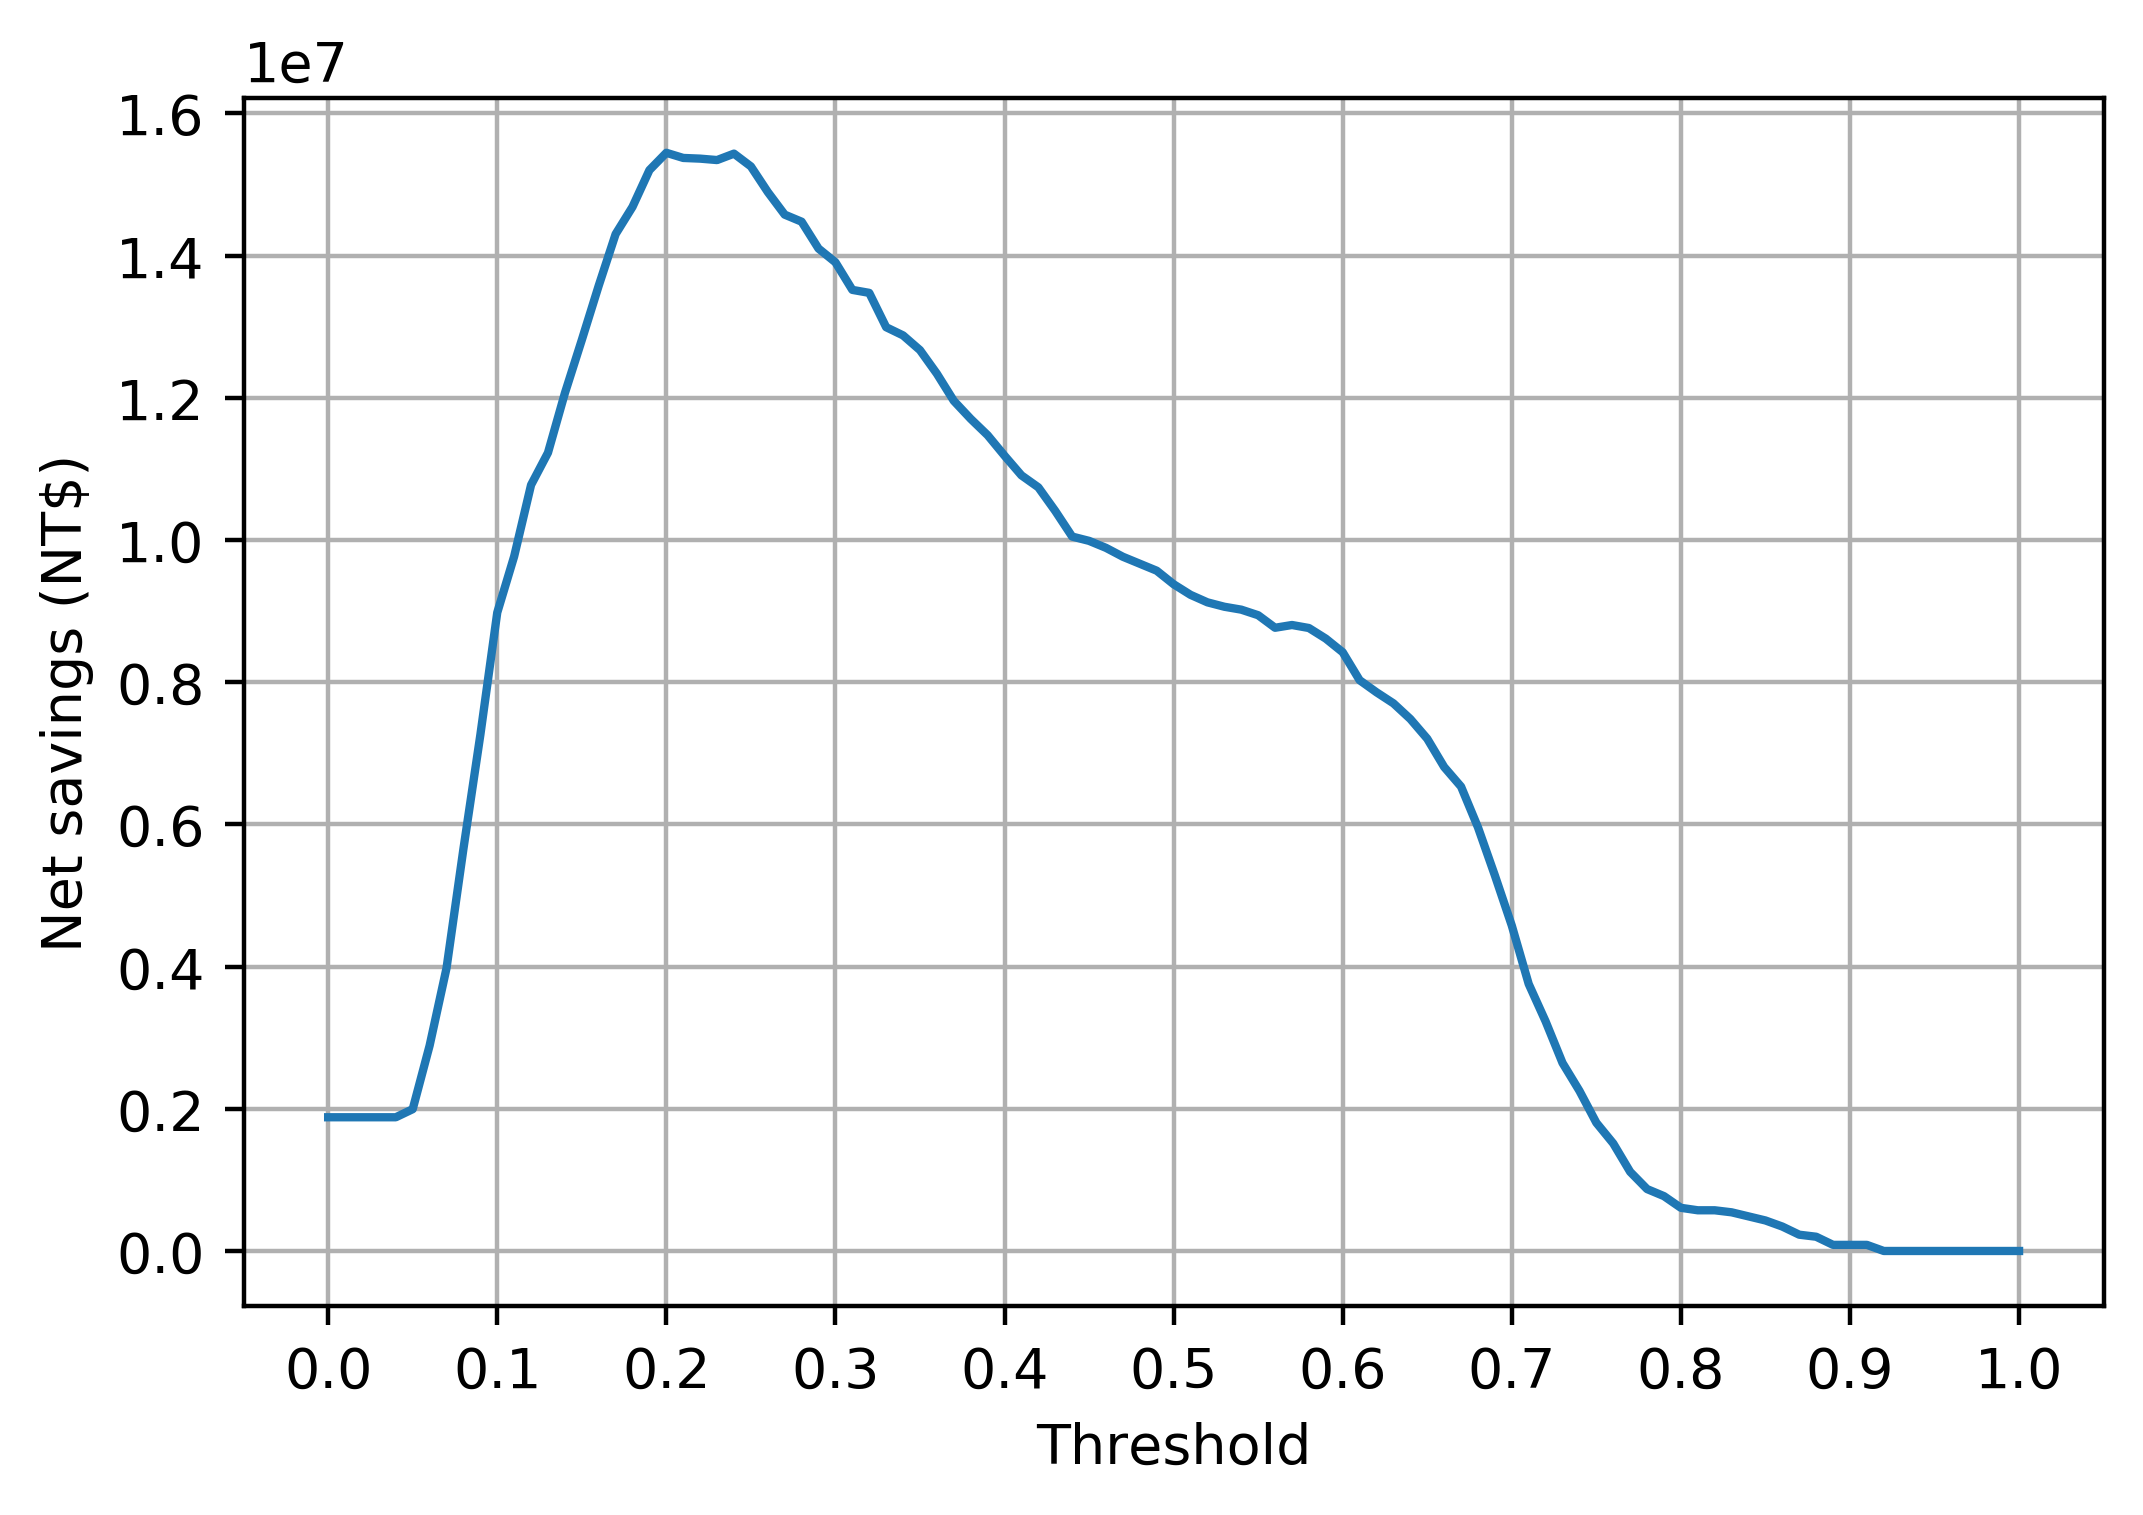

In [94]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [95]:
max_savings_ix = np.argmax(net_savings)

**What is the threshold at which maximum savings is achieved?**

In [96]:
thresholds[max_savings_ix]

0.2

In [97]:
#What is the maximum possible savings?
net_savings[max_savings_ix]

15446325.35991916

# *Challenge: Deriving Financial Insights*

**Everything that is needed prior to this challenge has been included in the notebook above. You should run all the necessary portions of the provided code before beginning these tasks.**

In [98]:
# This will autosave your notebook every ten seconds\n",
%autosave 10

Autosaving every 10 seconds


**Using the testing set, calculate the cost of all defaults if there were no counseling program and output your result.**

In [99]:
cost_of_all_defaults = sum(y_test_all == 1) * savings_per_default
cost_of_all_defaults

66308240.202088244

**Next, calculate by what percent can the cost of defaults be decreased by the counseling program and output you result.**

In [100]:
print(f"{(net_savings[max_savings_ix] / cost_of_all_defaults) * 100} %")


23.29472975431598 %


**Then, calculate the net savings per account at the optimal threshold and output your result.**



In [101]:
net_savings_per_account = net_savings[max_savings_ix] / len(y_test_all)
net_savings_per_account

2601.2673223171373

**Now, plot the net savings per account against the cost of counseling per account for each threshold.**

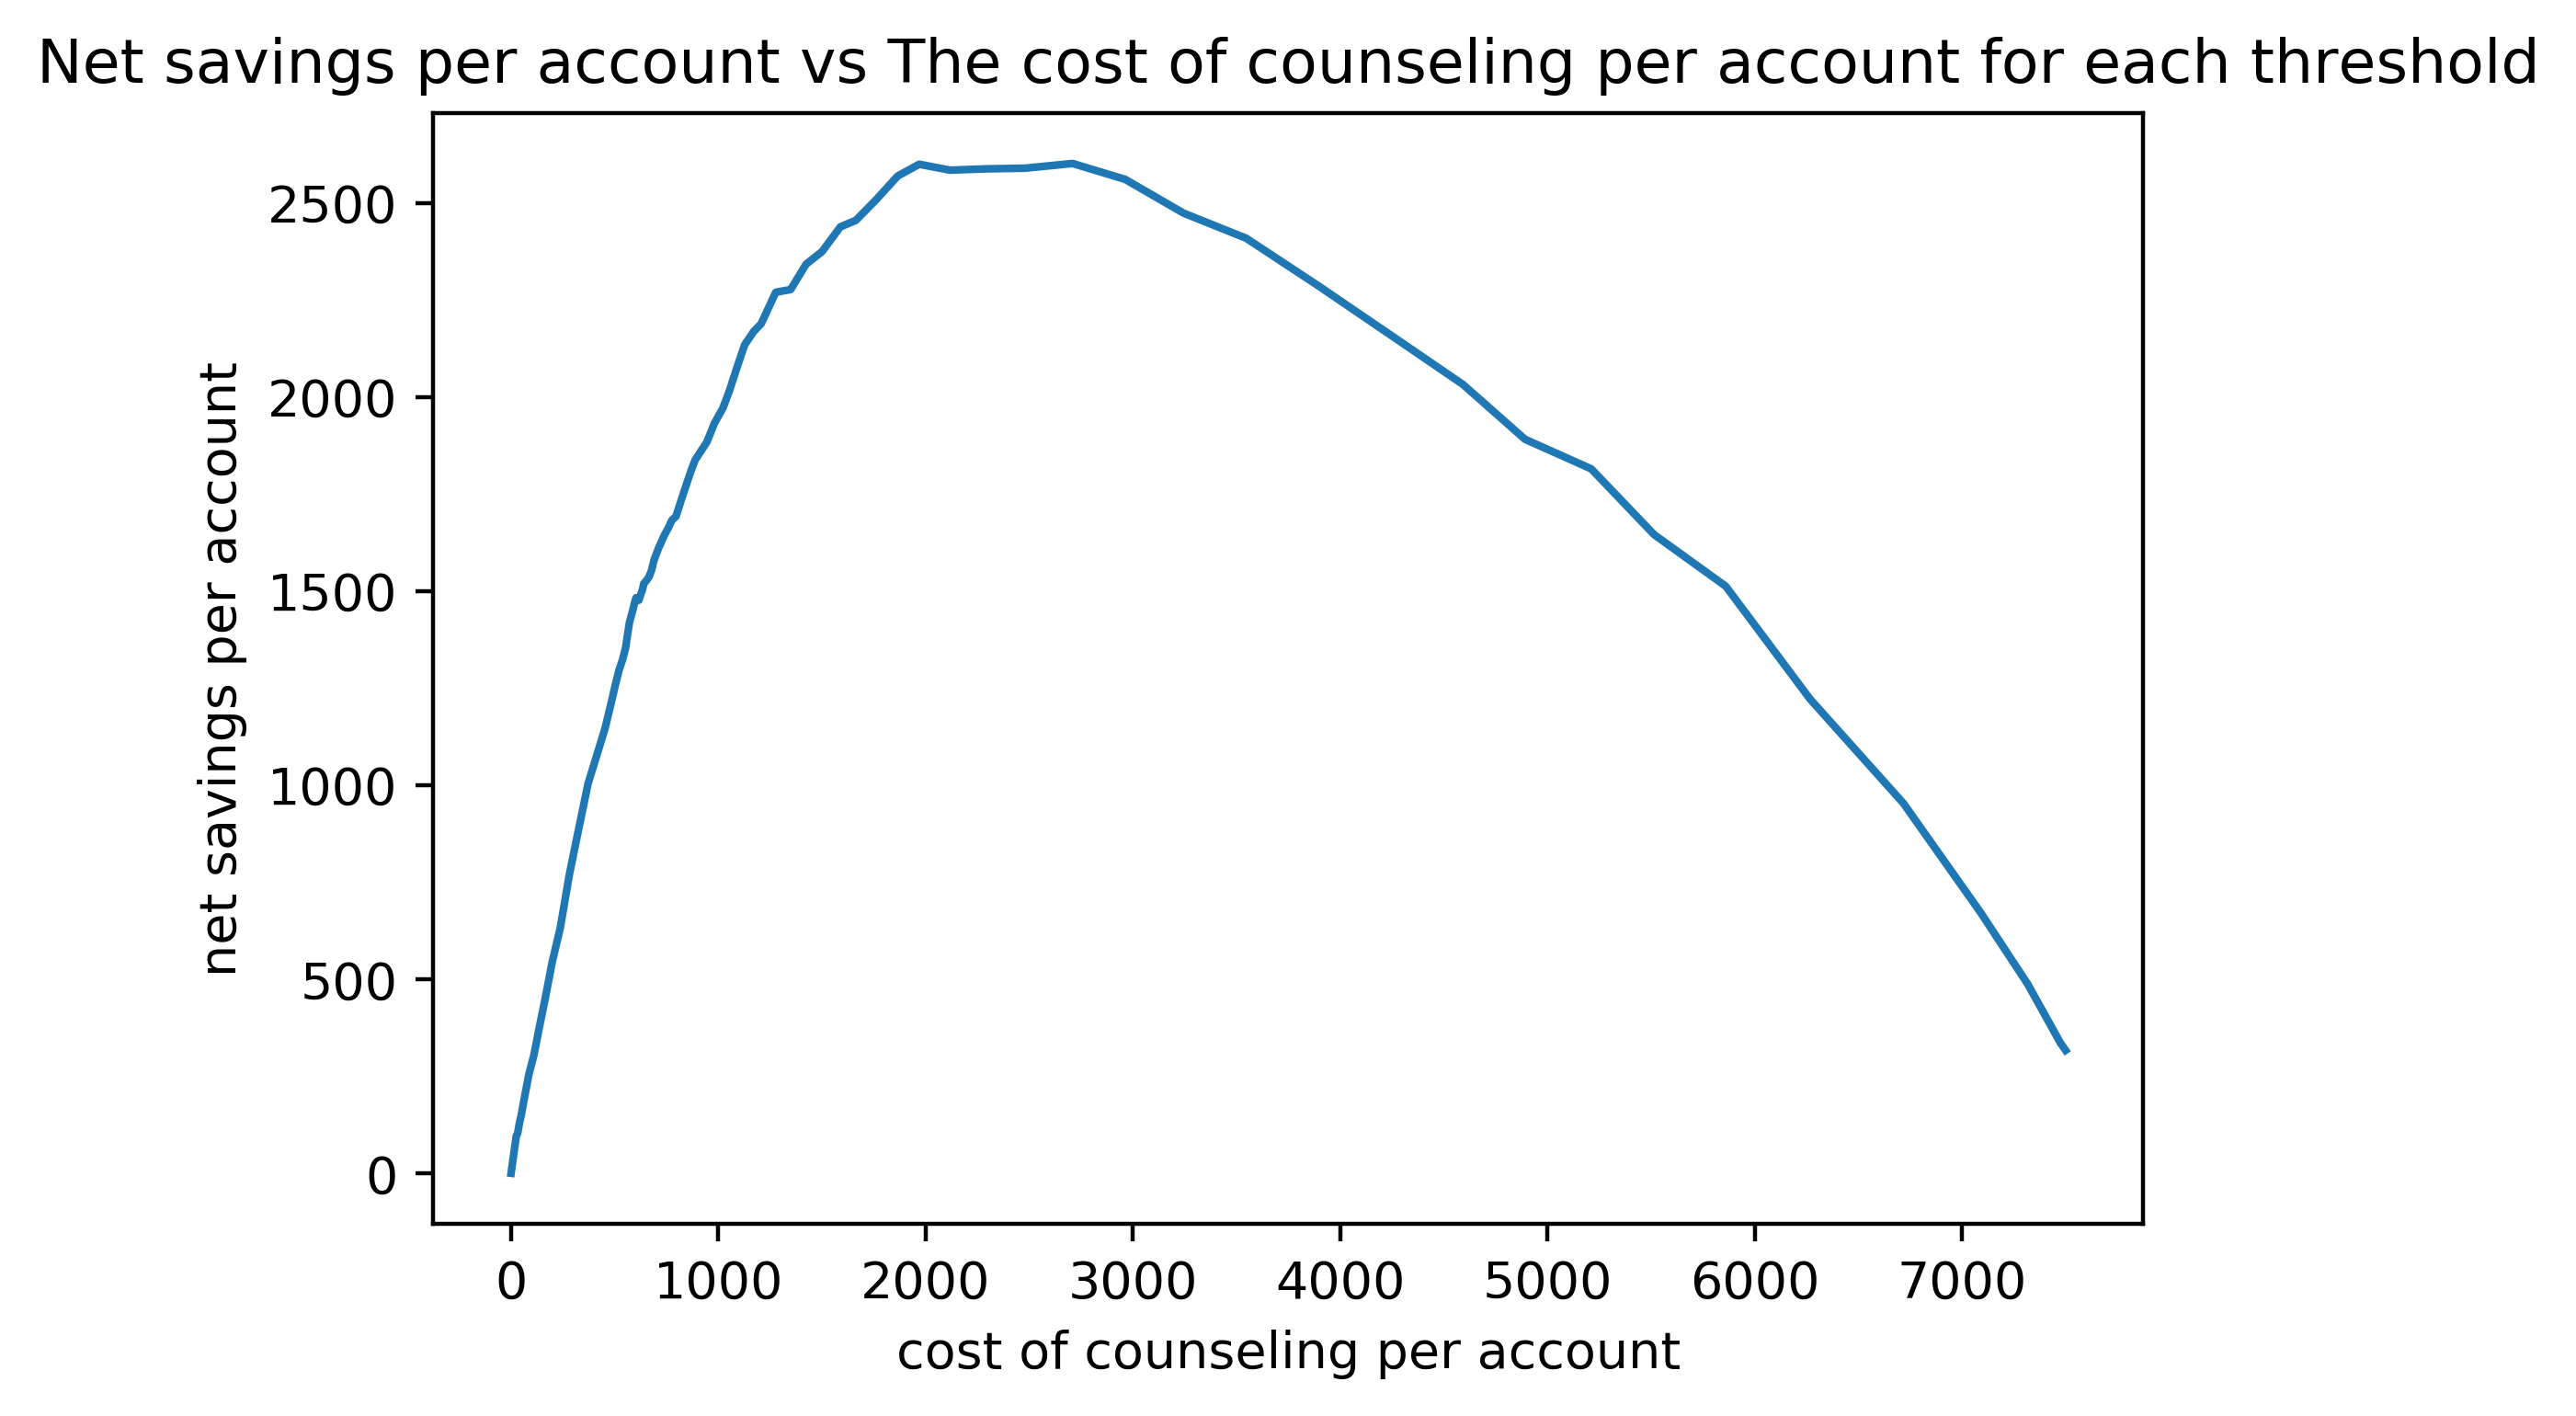

In [102]:
plt.plot(cost_of_all_counselings / len(y_test_all), net_savings/len(y_test_all))
plt.xlabel("cost of counseling per account")
plt.ylabel("net savings per account")
plt.title("Net savings per account vs The cost of counseling per account for each threshold")
plt.show()

**Next, plot a precision-recall curve for the testing data.**

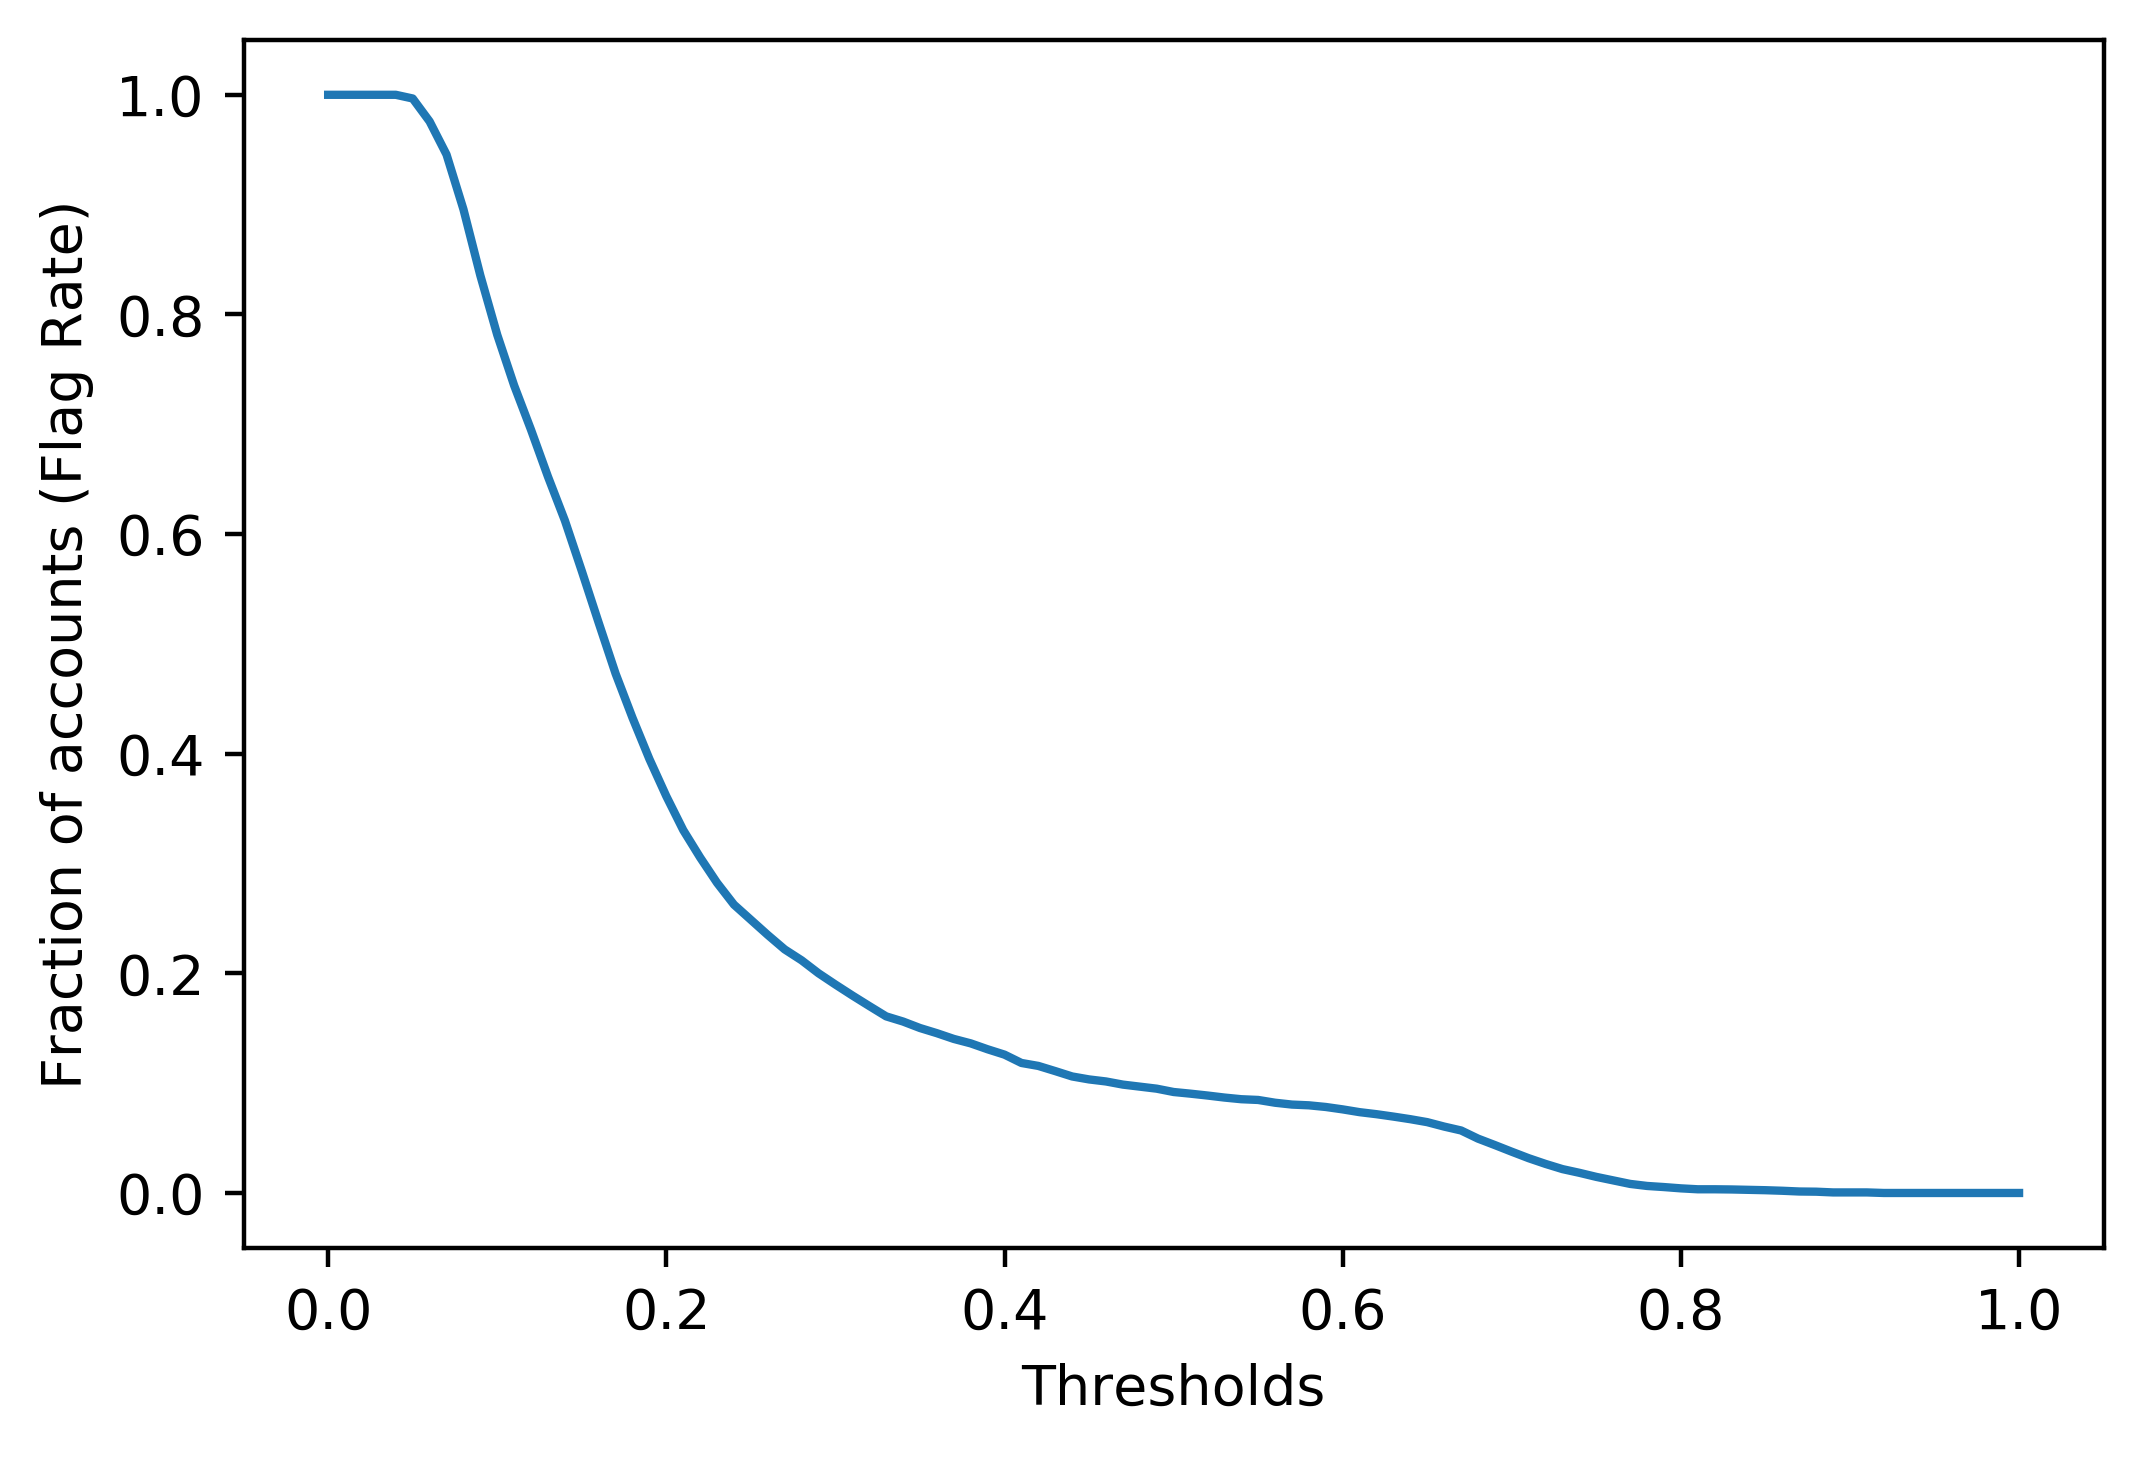

In [103]:
fractions = n_pos_pred / len(y_test_all)

plt.plot(thresholds, fractions)
plt.xlabel("Thresholds")
plt.ylabel("Fraction of accounts (Flag Rate)")
plt.show()


**Finally, plot precision and recall separately on the y-axis against threshold on the x-axis.**

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


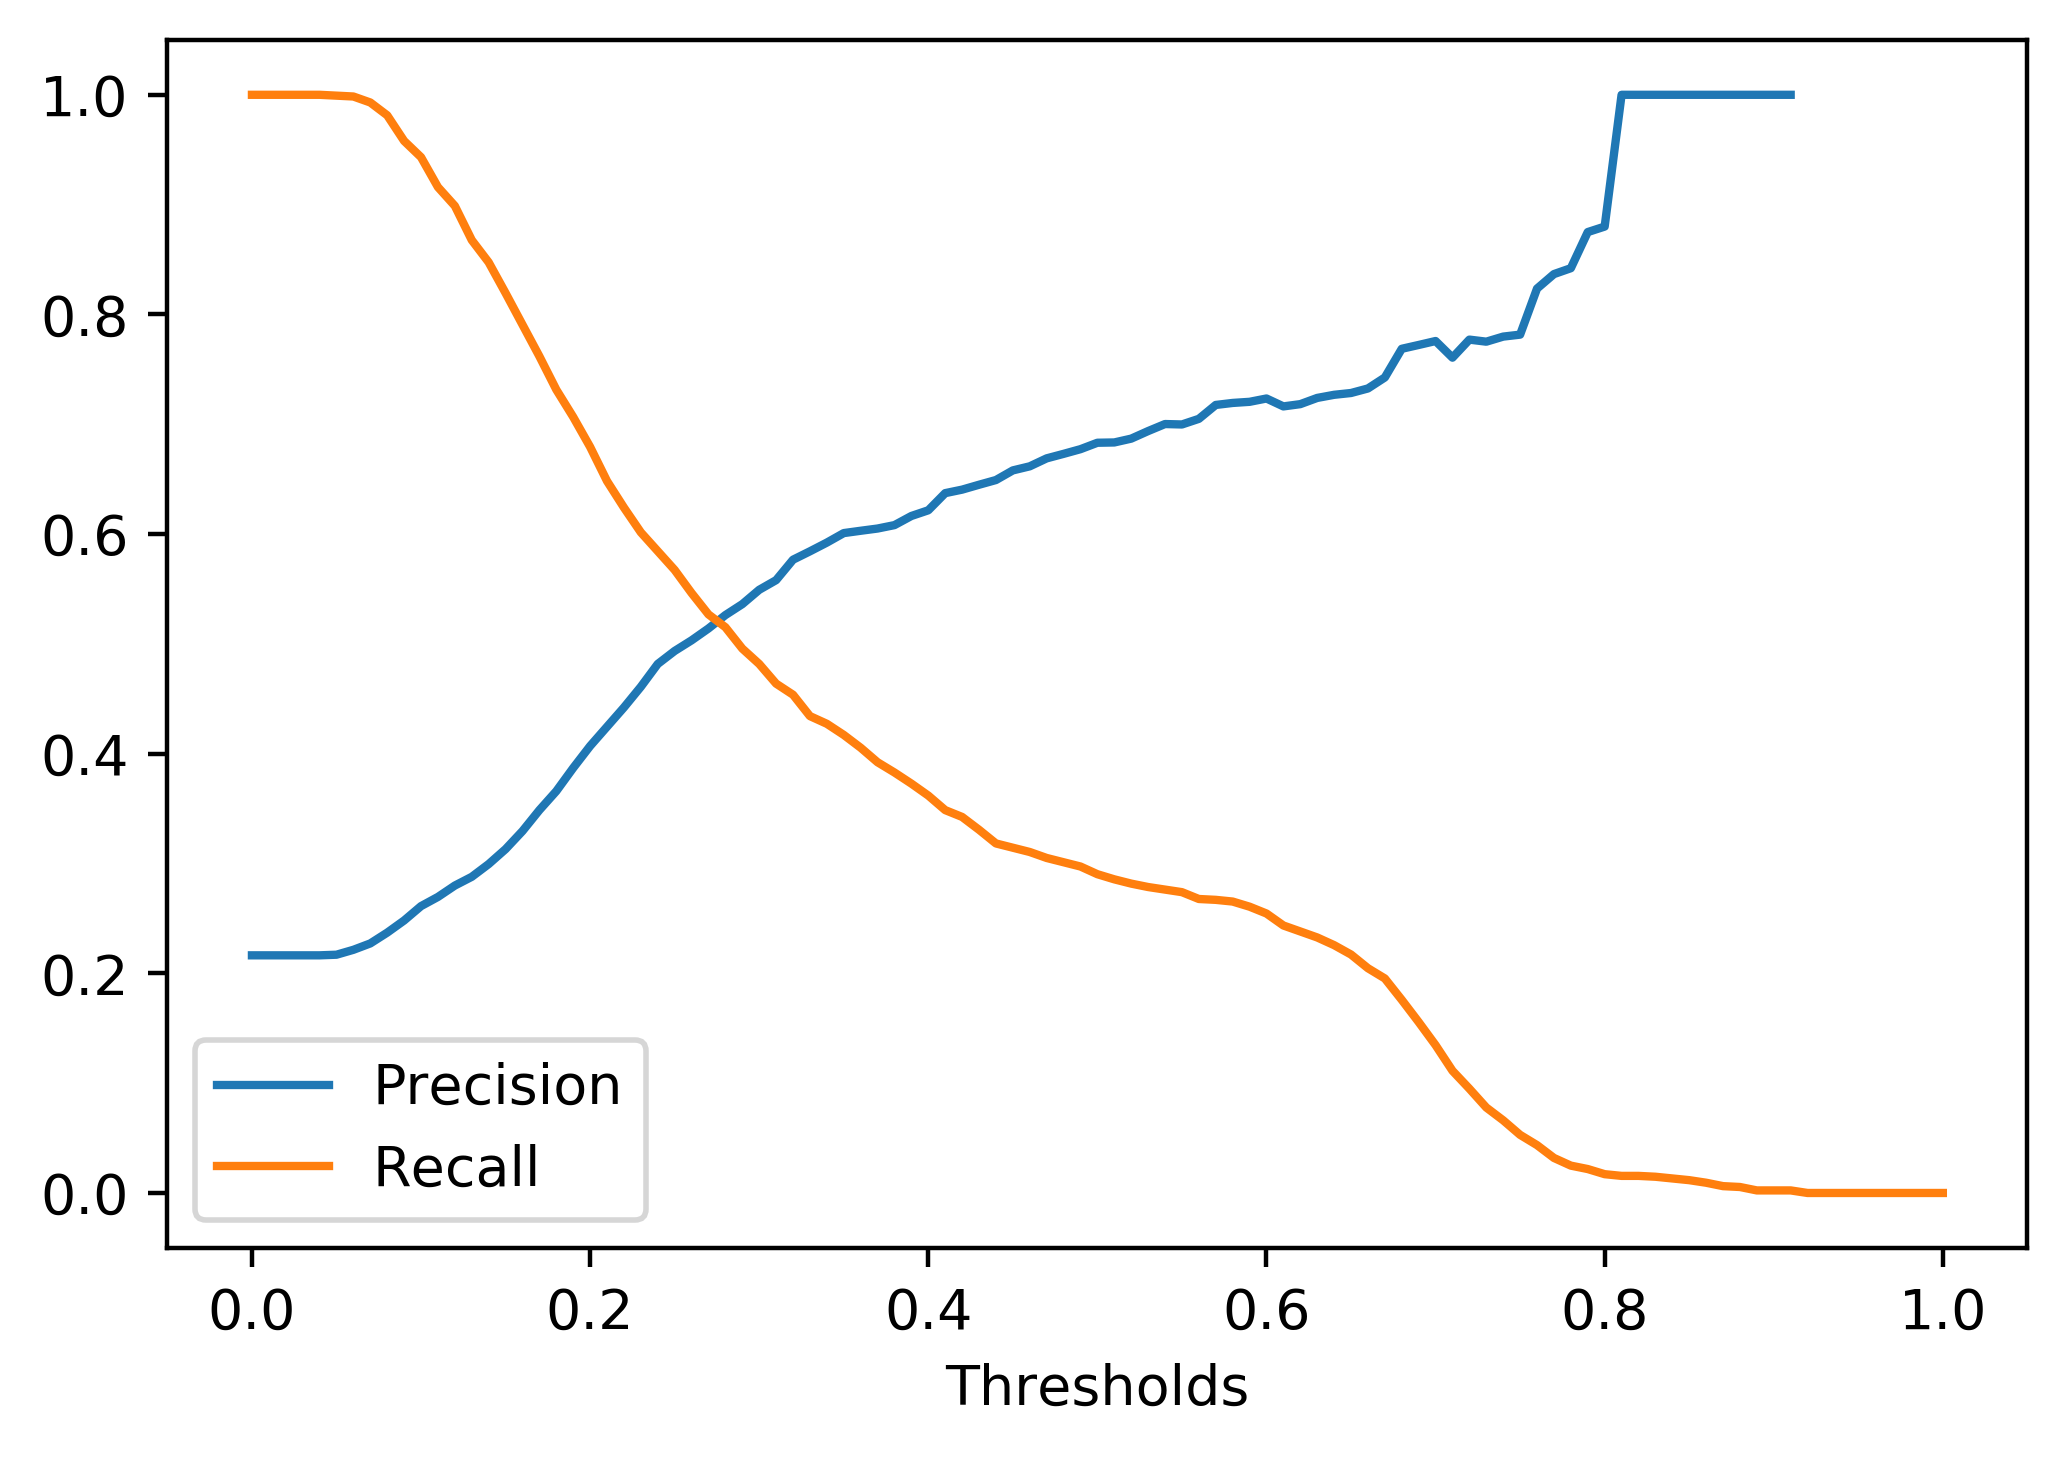

In [104]:
precision = n_true_pos / n_pos_pred
recall = n_true_pos/sum(y_test_all)

plt.plot(thresholds, precision, label = "Precision")
plt.plot(thresholds, recall, label = "Recall")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

Text(0, 0.5, 'Number of accounts')

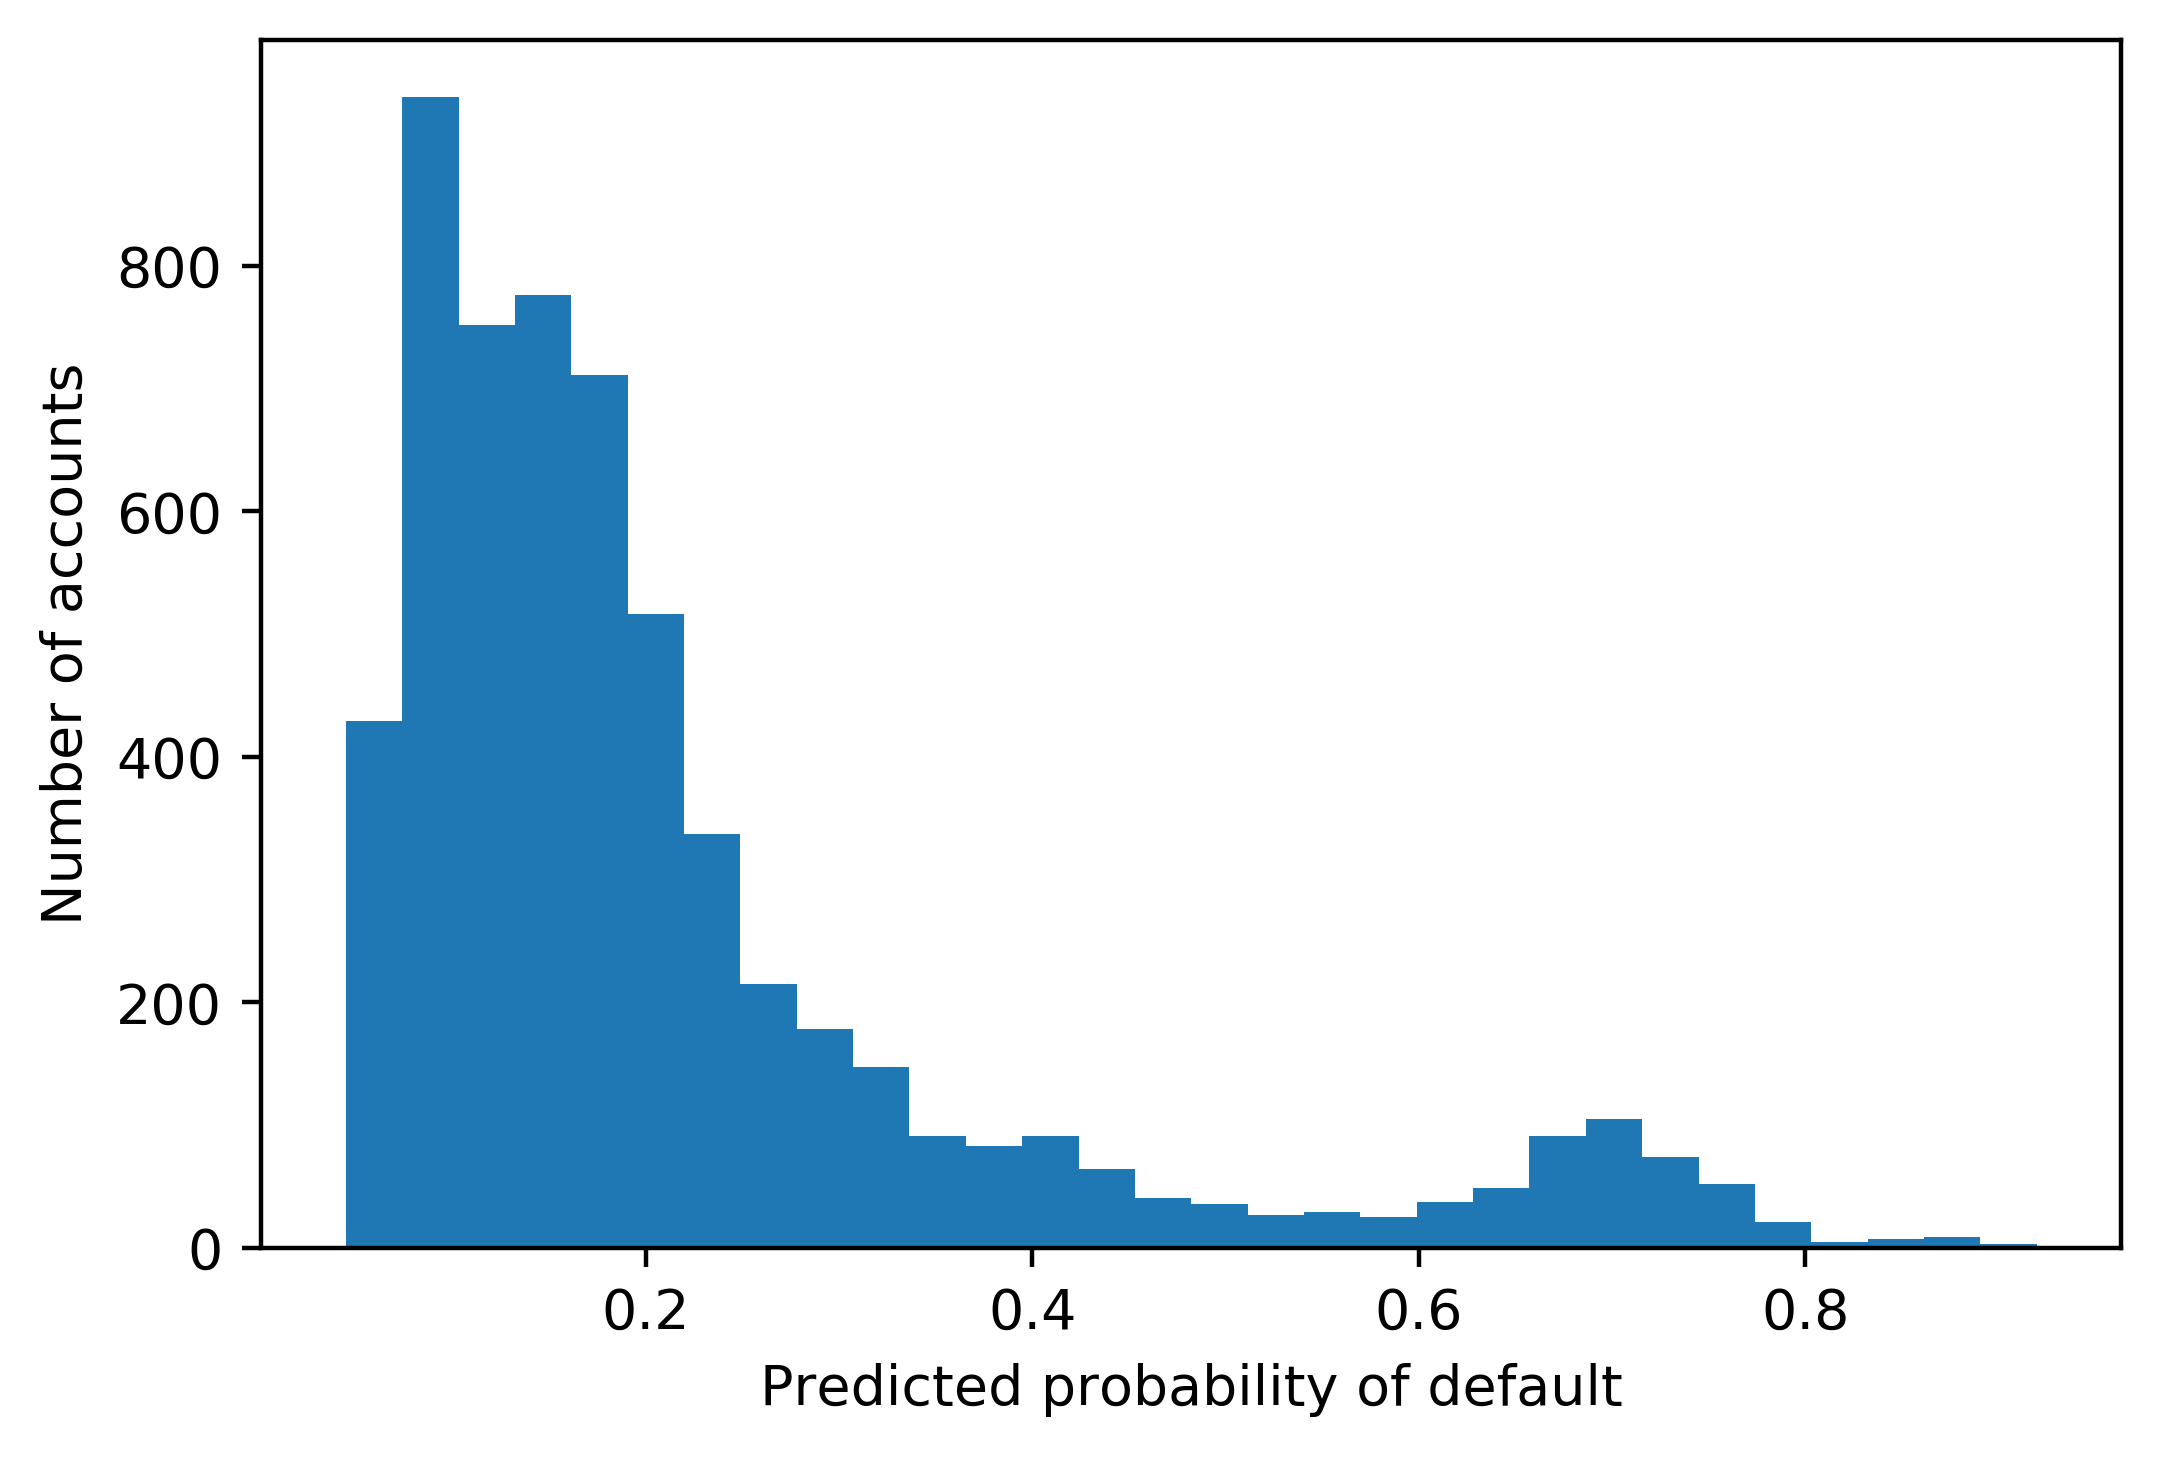

In [105]:
plt.hist(y_test_all_predict_proba[:,1], bins=30)
plt.xlabel('Predicted probability of default')
plt.ylabel('Number of accounts')